# Problema

Una entidad bancaria contrata a una empresa de marketing encargada de contactar telefónicamente a posibles clientes para determinar si están interesados o no en adquirir un certificado de depósito a término con el banco.

¿Qué perfil tienen los clientes con mayor potencial de conversión?

# El set de datos después de la limpieza

La información recolectada por la empresa de mercadeo se encuentra en un archivo CSV (`dataset_banco_clean.csv`) con 45189 filas y 17 columnas.

Cada registro contiene 16 características (las primeras 16 columnas) y una categoría ("yes" o "no" dependiendo de si la persona está o no interesada en adquirir el producto). Las columnas son:

1. "age":  edad (numérica)
2. "job": tipo de trabajo (categórica: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar","self-employed", "retired", "technician", "services")
3. "marital": estado civil (categórica: "married", "divorced", "single")
4. "education": nivel educativo (categórica: "unknown", "secondary", "primary", "tertiary")
5. "default": si dejó de pagar sus obligaciones (categórica: "yes", "no")
6. "balance": saldo promedio anual en euros (numérica)
7. "housing": ¿tiene o no crédito hipotecario? (categórica: "yes", "no")
8. "loan": ¿tiene créditos de consumo? (categórica: "yes", "no")
9. "contact": medio a través del cual fue contactado (categórica: "unknown", "telephone", "cellular")
10. "day": último día del mes en el que fue contactada (numérica)
11. "month": último mes en el que fue contactada (categórica: "jan", "feb", "mar", ..., "nov", "dec")
12. "duration": duración (en segundos) del último contacto (numérica)
13. "campaign": número total de veces que fue contactada durante la campaña (numérica)
14. "pdays": número de días transcurridos después de haber sido contactado antes de la campaña actual (numérica. -1 indica que no fue contactado previamente)
15. "previous": número de veces que ha sido contactada antes de esta campaña (numérica)
16. "poutcome": resultado de la campaña de marketing anterior (categórica: "unknown", "other", "failure", "success")
17. "y": categoría ¿el cliente se suscribió a un depósito a término? (categórica: "yes", "no")

In [ ]:
# imports
import pandas as pd

In [ ]:
ruta = "/dataset_banco_clean.csv"
df = pd.read_csv(ruta)

In [ ]:
print(df.shape)
df.head()

(45189, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no


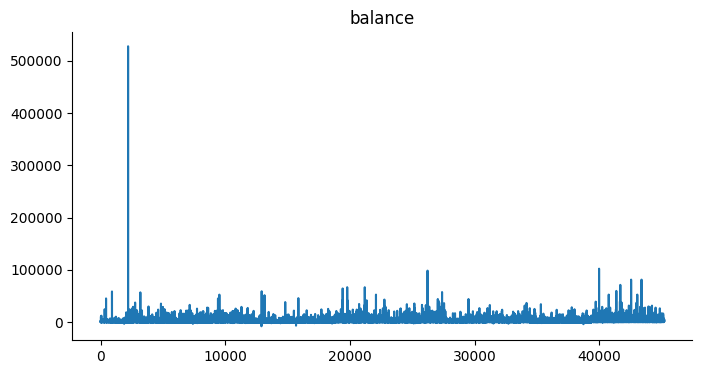

In [ ]:
# @title balance

from matplotlib import pyplot as plt
df['balance'].plot(kind='line', figsize=(8, 4), title='balance')
plt.gca().spines[['top', 'right']].set_visible(False)

# Análisis exploratorio

La idea es usar herramientas estadísticas y de visualización para:

- Crear un mapa mental del set de datos (entenderlo)
- Empezar a encontrar respuestas a la pregunta planteada inicialmente (¿qué perfil tienen los clientes con mayor potencial de conversión?)

Llevaremos a cabo estas fases:

1. Análisis de cada variable de manera individual
2. Análisis univariado: relación de cada variable predictora con la variable a predecir
3. Análisis bivariado: relación de pares de variables predictoras con la variable a predecir

Para cada una de ellas generar un pequeño resumen

In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45189.000000,45189.000000,45189.000000,45189.000000,45189.000000,45189.000000,45189.000000
mean,40.936445,1374.012149,15.807188,258.115006,2.763283,40.178893,0.574166
std,10.618502,3924.370039,8.322549,257.349601,3.096579,100.107295,1.907950
min,18.000000,-8019.000000,1.000000,1.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,527532.000000,31.000000,4918.000000,63.000000,871.000000,58.000000


In [ ]:
# Eliminar filas con "unknown" en la columna "poutcome"
#df = df[df['poutcome'] != 'unknown']


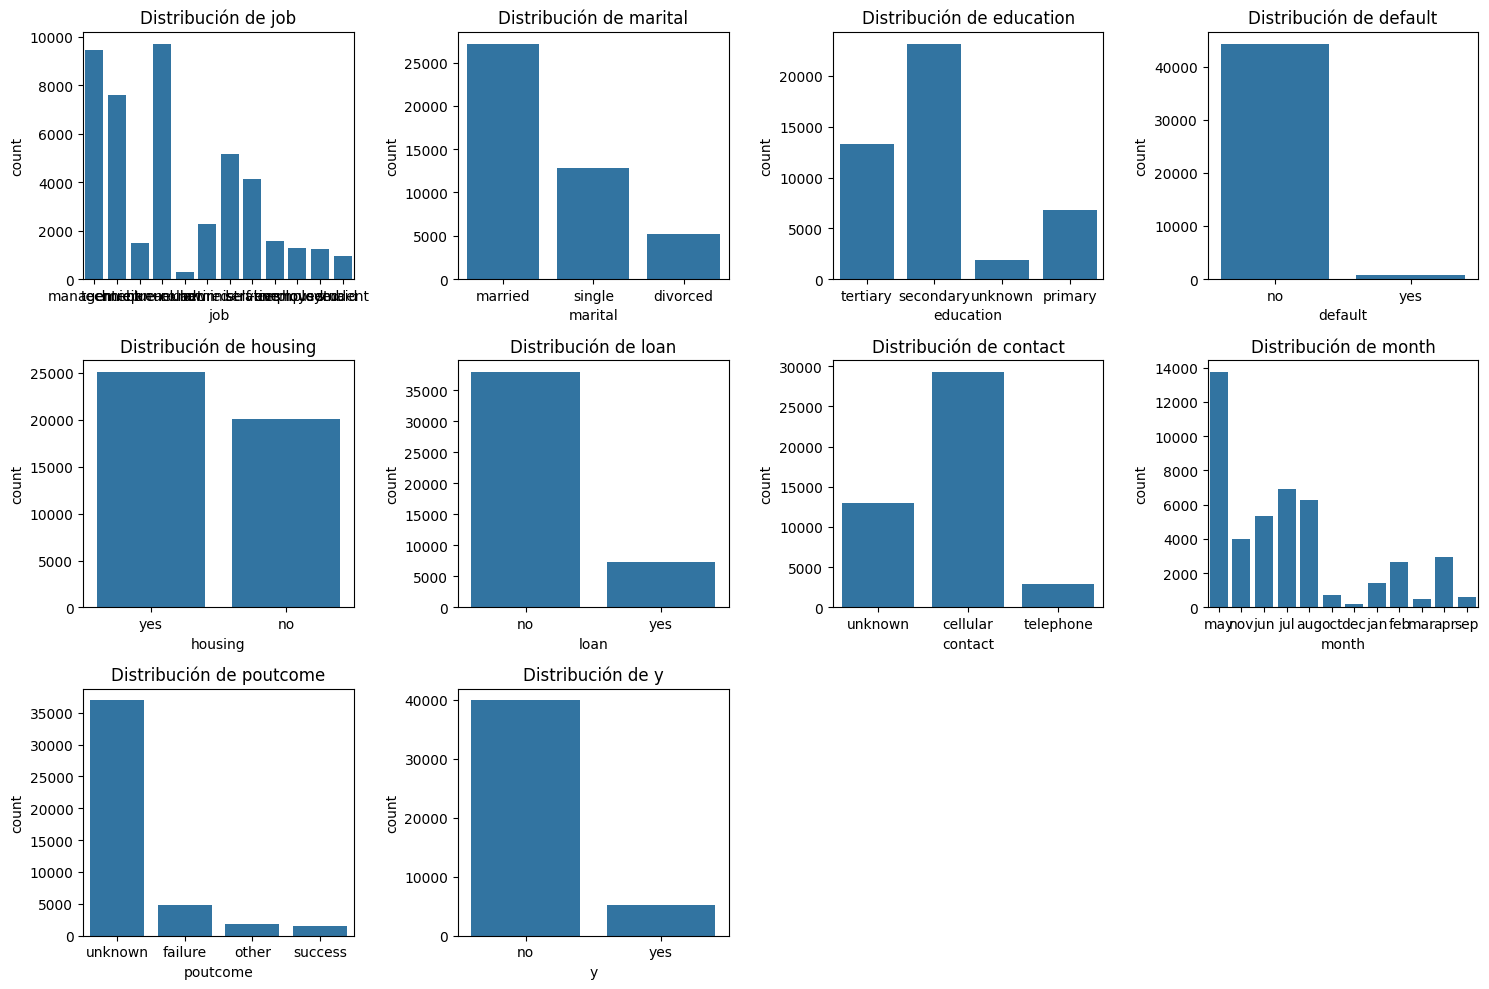

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribución de variables categóricas
plt.figure(figsize=(15, 10))

categorical_columns = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome", "y"]

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 4, i)
    sns.countplot(x=column, data=df)
    plt.title(f'Distribución de {column}')

plt.tight_layout()
plt.show()


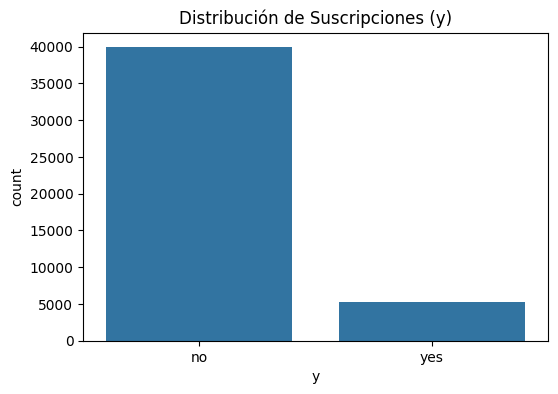

no     0.883047
yes    0.116953
Name: y, dtype: float64


In [ ]:
# Análisis de la variable objetivo
plt.figure(figsize=(6, 4))
sns.countplot(x='y', data=df)
plt.title('Distribución de Suscripciones (y)')
plt.show()

# Proporción de suscripciones
subscription_ratio = df['y'].value_counts(normalize=True)
print(subscription_ratio)


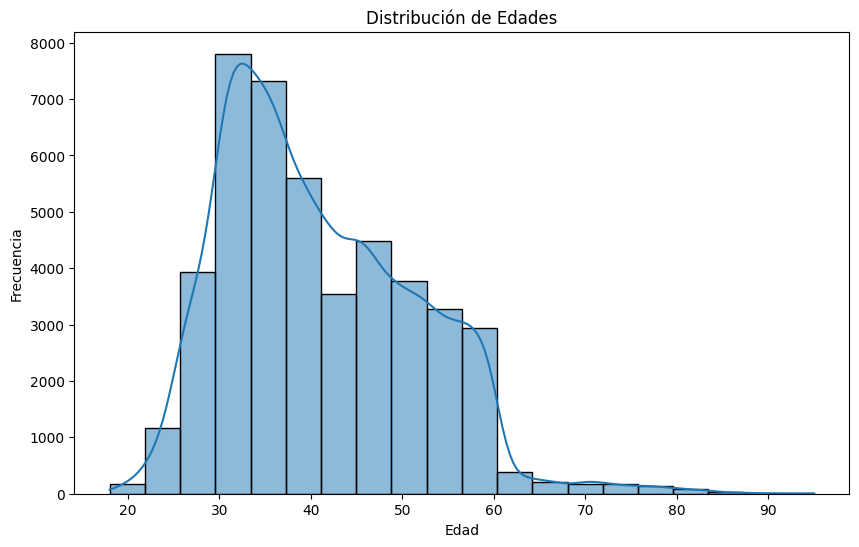

In [ ]:
# Distribución de edades
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()


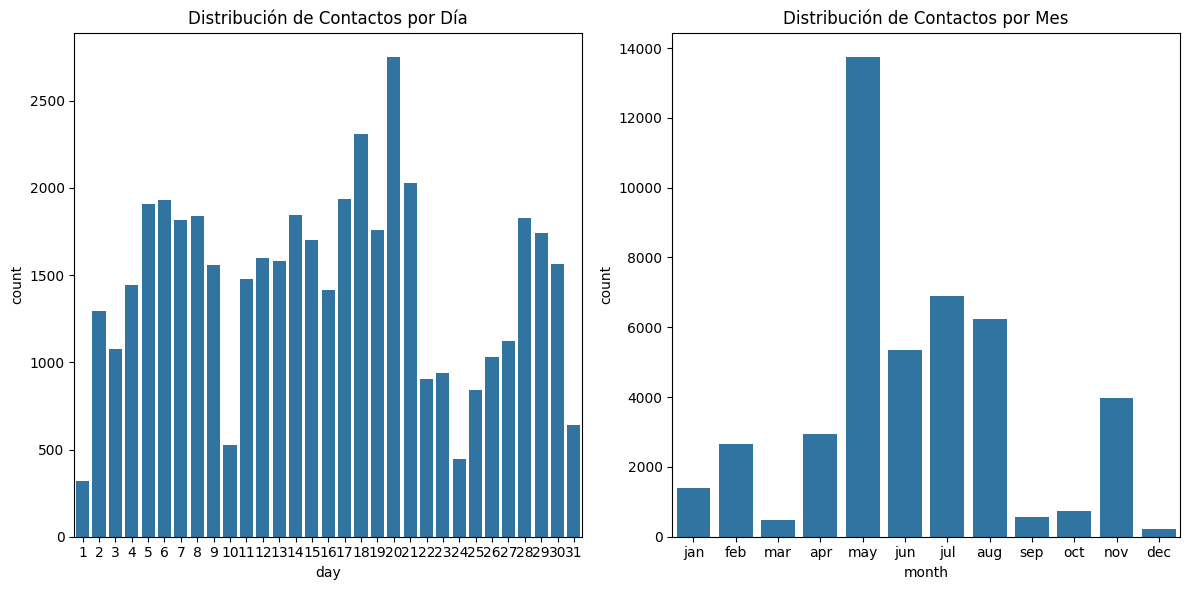

In [ ]:
# Distribución de contactos por día y mes
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='day', data=df)
plt.title('Distribución de Contactos por Día')

plt.subplot(1, 2, 2)
sns.countplot(x='month', data=df, order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
plt.title('Distribución de Contactos por Mes')

plt.tight_layout()
plt.show()


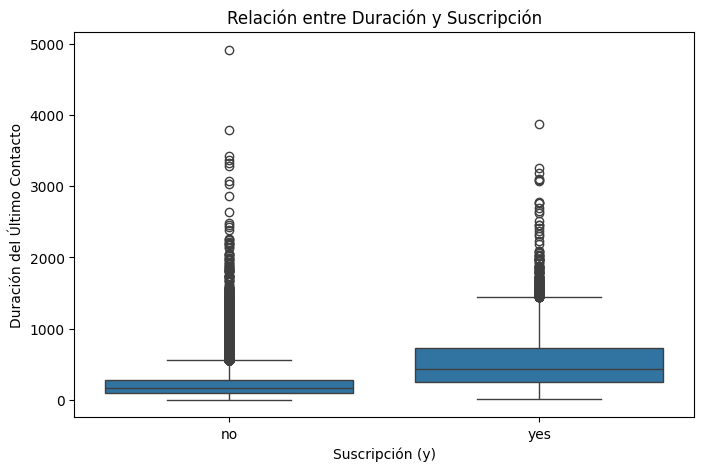

In [ ]:
# Análisis de duración del último contacto
plt.figure(figsize=(8, 5))
sns.boxplot(x='y', y='duration', data=df)
plt.title('Relación entre Duración y Suscripción')
plt.xlabel('Suscripción (y)')
plt.ylabel('Duración del Último Contacto')
plt.show()


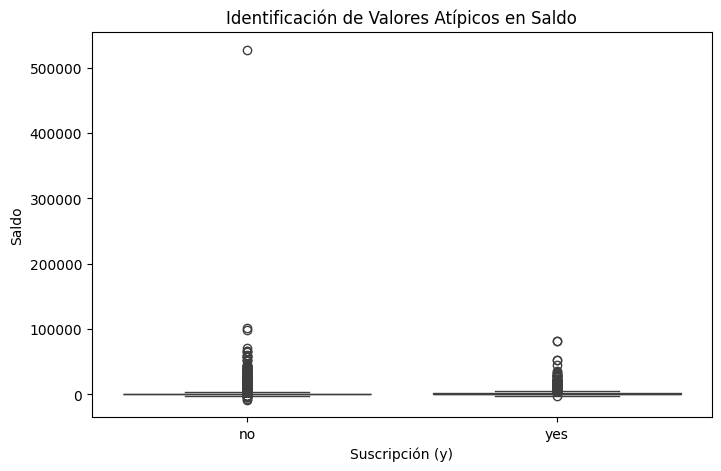

In [ ]:
# Identificación de valores atípicos en saldo
plt.figure(figsize=(8, 5))
sns.boxplot(x='y', y='balance', data=df)
plt.title('Identificación de Valores Atípicos en Saldo')
plt.xlabel('Suscripción (y)')
plt.ylabel('Saldo')
plt.show()


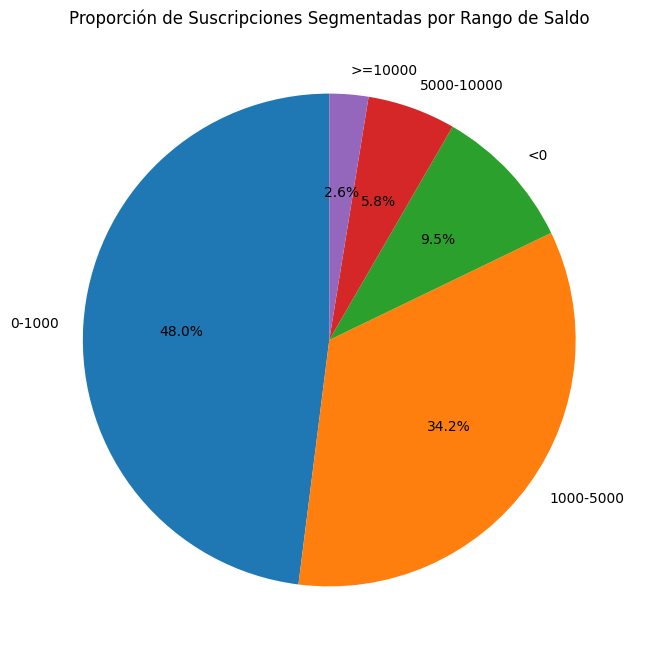

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear rangos para el saldo
bins = [-float('inf'), 0, 1000, 5000, 10000, float('inf')]
labels = ['<0', '0-1000', '1000-5000', '5000-10000', '>=10000']

df['balance_range'] = pd.cut(df['balance'], bins=bins, labels=labels)

# Conteo de suscripciones por rango de saldo
subscription_counts = df[df['y'] == 'yes']['balance_range'].value_counts()

# Crear un gráfico de tarta segmentado
plt.figure(figsize=(10, 8))
plt.pie(subscription_counts, labels=subscription_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Proporción de Suscripciones Segmentadas por Rango de Saldo')
plt.show()


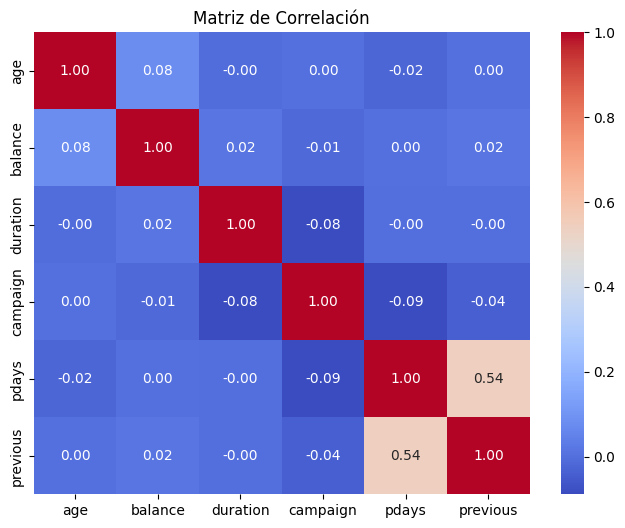

In [ ]:
# Correlación entre variables numéricas
correlation_matrix = df[["age", "balance", "duration", "campaign", "pdays", "previous"]].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()


# Conclusiones

In [ ]:
# Eliminar las columnas especificadas del DataFrame
# columns_to_drop = ['job','contact', 'day', 'month', 'pdays']
# df = df.drop(columns=columns_to_drop, axis=1)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Suponiendo que 'df' es tu conjunto de datos original
# y has definido las variables 'X' (características) e 'y' (objetivo) como en tu código anterior
X = df.drop(['y'], axis=1)
y = df['y']
# Convertir variables categóricas usando codificación one-hot
X_encoded = pd.get_dummies(X, drop_first=True)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo de Regresión Logística
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Score: 0.8893560522239433

Confusion Matrix:
 [[7848  130]
 [ 870  190]]

Classification Report:
               precision    recall  f1-score   support

          no       0.90      0.98      0.94      7978
         yes       0.59      0.18      0.28      1060

    accuracy                           0.89      9038
   macro avg       0.75      0.58      0.61      9038
weighted avg       0.86      0.89      0.86      9038



In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Inicializar y entrenar el modelo de Árbol de Decisión
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
tree_y_pred = tree_model.predict(X_test)

# Evaluar el rendimiento del modelo de Árbol de Decisión
print("Accuracy Score (Decision Tree):", accuracy_score(y_test, tree_y_pred))
print("\nConfusion Matrix (Decision Tree):\n", confusion_matrix(y_test, tree_y_pred))
print("\nClassification Report (Decision Tree):\n", classification_report(y_test, tree_y_pred))


Accuracy Score (Decision Tree): 0.8764107103341447

Confusion Matrix (Decision Tree):
 [[7430  548]
 [ 569  491]]

Classification Report (Decision Tree):
               precision    recall  f1-score   support

          no       0.93      0.93      0.93      7978
         yes       0.47      0.46      0.47      1060

    accuracy                           0.88      9038
   macro avg       0.70      0.70      0.70      9038
weighted avg       0.88      0.88      0.88      9038



In [ ]:
from sklearn.svm import SVC

# Inicializar y entrenar el modelo de Máquinas de Soporte Vectorial
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_svm_pred = svm_model.predict(X_test)

# Evaluar el rendimiento del modelo
print("Accuracy Score (SVM):", accuracy_score(y_test, y_svm_pred))
print("\nConfusion Matrix (SVM):\n", confusion_matrix(y_test, y_svm_pred))
print("\nClassification Report (SVM):\n", classification_report(y_test, y_svm_pred))


Accuracy Score (SVM): 0.8822748395662757

Confusion Matrix (SVM):
 [[7968   10]
 [1054    6]]

Classification Report (SVM):
               precision    recall  f1-score   support

          no       0.88      1.00      0.94      7978
         yes       0.38      0.01      0.01      1060

    accuracy                           0.88      9038
   macro avg       0.63      0.50      0.47      9038
weighted avg       0.82      0.88      0.83      9038



In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import class_weight
from xgboost import XGBClassifier
import numpy as np


# Inicializar el codificador de etiquetas
label_encoder = LabelEncoder()

# Convertir las clases 'no' y 'yes' a enteros
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Obtener las clases únicas
unique_classes = np.unique(y_train)

# Calcular los pesos de clase
class_weights = class_weight.compute_class_weight('balanced', classes=unique_classes, y=y_train)

# Inicializar y entrenar el modelo de XGBoost con pesos de clase
xgb_model = XGBClassifier(random_state=42, scale_pos_weight=class_weights[1])
xgb_model.fit(X_train, y_train_encoded)

# Realizar predicciones en el conjunto de prueba
y_xgb_pred = xgb_model.predict(X_test)

# Evaluar el rendimiento del modelo
print("Accuracy Score (XGBoost):", accuracy_score(y_test_encoded, y_xgb_pred))
print("\nConfusion Matrix (XGBoost):\n", confusion_matrix(y_test_encoded, y_xgb_pred))
print("\nClassification Report (XGBoost):\n", classification_report(y_test_encoded, y_xgb_pred))


Accuracy Score (XGBoost): 0.8917902190750165

Confusion Matrix (XGBoost):
 [[7273  705]
 [ 273  787]]

Classification Report (XGBoost):
               precision    recall  f1-score   support

           0       0.96      0.91      0.94      7978
           1       0.53      0.74      0.62      1060

    accuracy                           0.89      9038
   macro avg       0.75      0.83      0.78      9038
weighted avg       0.91      0.89      0.90      9038



In [ ]:
# Obtener la importancia de las características
feature_importances = xgb_model.feature_importances_

# Mostrar la importancia de las características
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)


                     Feature  Importance
40          poutcome_success    0.183453
41          poutcome_unknown    0.158323
27           contact_unknown    0.102151
34                 month_mar    0.049099
3                   duration    0.041842
24               housing_yes    0.036023
37                 month_oct    0.031649
30                 month_feb    0.028593
33                 month_jun    0.028259
28                 month_aug    0.027030
32                 month_jul    0.026875
35                 month_may    0.020873
38                 month_sep    0.017906
31                 month_jan    0.017544
36                 month_nov    0.015759
25                  loan_yes    0.014055
14               job_student    0.013914
29                 month_dec    0.012478
5                      pdays    0.010442
2                        day    0.009789
21        education_tertiary    0.007935
0                        age    0.007917
4                   campaign    0.007758
18           mar

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# Inicializar el modelo de XGBoost
xgb_model = XGBClassifier(random_state=42, scale_pos_weight=class_weights[1])

# Inicializar la búsqueda de cuadrícula
grid_search = GridSearchCV(xgb_model, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train_encoded)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_

# Inicializar y entrenar el modelo de XGBoost con los mejores hiperparámetros
best_xgb_model = XGBClassifier(random_state=42, scale_pos_weight=class_weights[1], **best_params)
best_xgb_model.fit(X_train, y_train_encoded)

# Realizar predicciones en el conjunto de prueba
y_xgb_pred = best_xgb_model.predict(X_test)

# Evaluar el rendimiento del modelo ajustado
print("Accuracy Score (XGBoost - Ajustado):", accuracy_score(y_test_encoded, y_xgb_pred))
print("\nConfusion Matrix (XGBoost - Ajustado):\n", confusion_matrix(y_test_encoded, y_xgb_pred))
print("\nClassification Report (XGBoost - Ajustado):\n", classification_report(y_test_encoded, y_xgb_pred))


Accuracy Score (XGBoost - Ajustado): 0.9039610533303828

Confusion Matrix (XGBoost - Ajustado):
 [[7794  184]
 [ 684  376]]

Classification Report (XGBoost - Ajustado):
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      7978
           1       0.67      0.35      0.46      1060

    accuracy                           0.90      9038
   macro avg       0.80      0.67      0.71      9038
weighted avg       0.89      0.90      0.89      9038



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Inicializar y entrenar el modelo de Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train_encoded)

# Realizar predicciones en el conjunto de prueba
y_rf_pred = rf_model.predict(X_test)

# Evaluar el rendimiento del modelo de Random Forest
print("Accuracy Score (Random Forest):", accuracy_score(y_test_encoded, y_rf_pred))
print("\nConfusion Matrix (Random Forest):\n", confusion_matrix(y_test_encoded, y_rf_pred))
print("\nClassification Report (Random Forest):\n", classification_report(y_test_encoded, y_rf_pred))


ValueError: could not convert string to float: 'management'

In [ ]:
from sklearn.metrics import f1_score

# Calcular el F1-score con promedio micro
f1_micro = f1_score(y_test_encoded, y_rf_pred, average='micro')

print("F1 Score (micro) for Random Forest:", f1_micro)


F1 Score (micro) for Random Forest: 0.9072803717636645


In [ ]:
from sklearn.model_selection import GridSearchCV

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Inicializar el modelo de Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Inicializar la búsqueda de cuadrícula
grid_search_rf = GridSearchCV(rf_model, param_grid, cv=3, scoring='accuracy')
grid_search_rf.fit(X_train, y_train_encoded)

# Obtener los mejores hiperparámetros
best_params_rf = grid_search_rf.best_params_

# Inicializar y entrenar el modelo de Random Forest con los mejores hiperparámetros
best_rf_model = RandomForestClassifier(random_state=42, **best_params_rf)
best_rf_model.fit(X_train, y_train_encoded)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

RandomForestClassifier(max_features='auto', min_samples_split=10,
                       n_estimators=200, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Asumiendo que X_train, y_train_encoded, X_test, y_test_encoded están definidos en otra parte

# Inicializar y entrenar el modelo de Random Forest con los parámetros específicos
rf_model = RandomForestClassifier(max_features='auto', min_samples_split=10, n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train_encoded)

# Realizar predicciones en el conjunto de prueba
y_rf_pred = rf_model.predict(X_test)

# Evaluar el rendimiento del modelo de Random Forest
print("Accuracy Score (Random Forest):", accuracy_score(y_test_encoded, y_rf_pred))
print("\nConfusion Matrix (Random Forest):\n", confusion_matrix(y_test_encoded, y_rf_pred))
print("\nClassification Report (Random Forest):\n", classification_report(y_test_encoded, y_rf_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Accuracy Score (Random Forest): 0.9072803717636645

Confusion Matrix (Random Forest):
 [[7819  159]
 [ 679  381]]

Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      7978
           1       0.71      0.36      0.48      1060

    accuracy                           0.91      9038
   macro avg       0.81      0.67      0.71      9038
weighted avg       0.89      0.91      0.89      9038



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Suponiendo que `df` es tu DataFrame.

# Separar características y etiqueta
X = df.drop('y', axis=1)
y = df['y'].map({'yes': 1, 'no': 0})  # Codificar la etiqueta como 0 y 1

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocesamiento: Codificar variables categóricas y escalar las numéricas
categorical_cols = [cname for cname in X_train.columns if X_train[cname].dtype == "object"]
numerical_cols = [cname for cname in X_train.columns if X_train[cname].dtype in ['int64', 'float64']]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Modelos base
base_models = [
    ('lr', make_pipeline(preprocessor, LogisticRegression(max_iter=1000))),
    ('dt', make_pipeline(preprocessor, DecisionTreeClassifier())),
    ('svc', make_pipeline(preprocessor, SVC(probability=True)))
]

# Modelo meta
meta_model = LogisticRegression()

# Ensamble de Stacking
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Entrenar el modelo ensamblado
stacking_clf.fit(X_train, y_train)

# Evaluar el modelo
print(f'Accuracy on test set: {stacking_clf.score(X_test, y_test):.2f}')


Accuracy on test set: 0.90
